In [10]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [            
            [ 178.478431, -17.6426563 ], 
            [ 178.4875358, -17.6427653 ], 
            [ 178.5163223, -17.6076001 ], 
            [ 178.5020381, -17.6065642 ], 
            [ 178.478431, -17.6426563 ],
        ]
    ],
}

In [11]:
from pystac_client import Client


client = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    ignore_conformance=True,
)
search = client.search(
    collections=["alos-dem"],
    intersects= area_of_interest,
)
items = list(search.get_items())
print(f"Returned {len(items)} items")

Returned 1 items


In [12]:
item = items[0]
print(item.assets)

{'data': <Asset href=https://ai4edataeuwest.blob.core.windows.net/alos-dem/AW3D30_global/ALPSMLC30_S018E178_DSM.tif>, 'tilejson': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/tilejson.json?collection=alos-dem&items=ALPSMLC30_S018E178_DSM&assets=data&colormap_name=terrain&rescale=-1000,4000>, 'rendered_preview': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=alos-dem&items=ALPSMLC30_S018E178_DSM&assets=data&colormap_name=terrain&rescale=-1000,4000>}


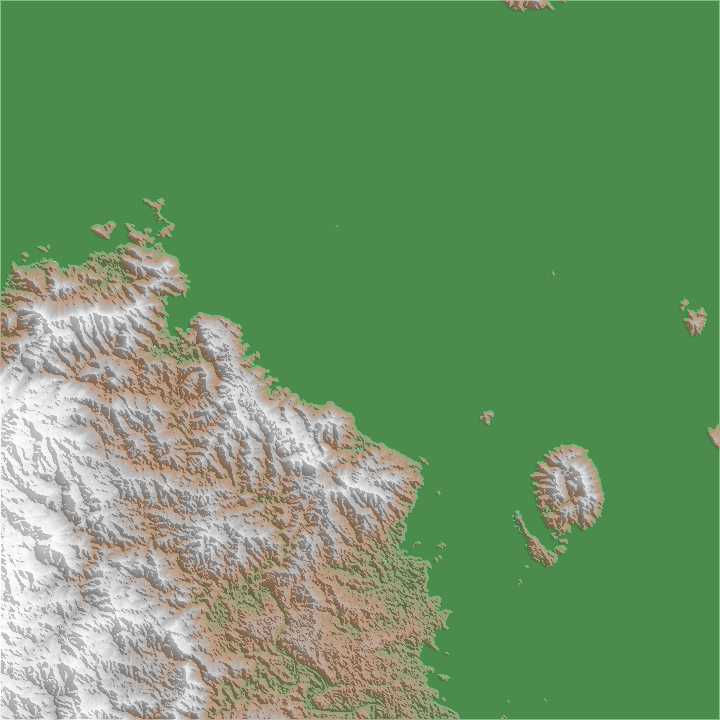

In [13]:
import planetary_computer
import xarray
import xrspatial
from datashader.transfer_functions import shade, stack
from datashader.colors import Elevation

signed_asset = planetary_computer.sign(item.assets["data"])
data = (
    xarray.open_rasterio(signed_asset.href)
    .squeeze()
    .drop("band")
    .coarsen({"y": 5, "x": 5})
    .mean()
)
hillshade = xrspatial.hillshade(data)
stack(shade(hillshade, cmap=["white", "gray"]), shade(data, cmap=Elevation, alpha=128))